In [23]:
# Import libs
from random import randint
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from sklearn.metrics import accuracy_score, classification_report

In [24]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)  # Shape of the train-set
print(x_test.shape)  # Shape of the test-set
print(set(y_train))  # Set of unique labels

(60000, 28, 28)
(10000, 28, 28)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


2


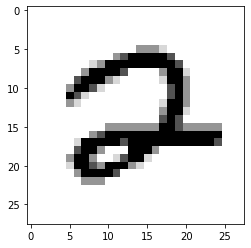

In [25]:
# Let's see what images we have inside MNIST
random_index_of_image = randint(0, x_train.shape[0])
plt.imshow(x_train[random_index_of_image], cmap='Greys')
print(y_train[random_index_of_image])


In [26]:
# Image pre-processing pipe-line
# Stage 1 - extending axis number to 4
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]
# Stage 2 - convert to float
x_train = x_train.astype('float')
x_test = x_test.astype('float')
# Stage 3 - normalizing RGB codes
x_train /= 255
x_test /= 255
print(x_train.shape)


(60000, 28, 28, 1)


In [27]:
# Build simple convolution network (CNN)
model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # For regularization purposes
model.add(Dense(10, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
# Run model training
model.fit(x=x_train, y=y_train, epochs=4)


Epoch 1/4
60000/60000 [==============================] - 23s 386us/step - loss: 0.2441 - accuracy: 0.9258
Epoch 2/4
60000/60000 [==============================] - 22s 366us/step - loss: 0.1090 - accuracy: 0.9663
Epoch 3/4
60000/60000 [==============================] - 20s 327us/step - loss: 0.0825 - accuracy: 0.9741
Epoch 4/4
60000/60000 [==============================] - 18s 294us/step - loss: 0.0665 - accuracy: 0.9790


In [29]:
# Model evaluation stage
y_pred = model.predict(x_test).argmax(axis=1)  # Model prediction process
print(accuracy_score(y_test, y_pred))  # Confusion matrix for multiclass
print(classification_report(y_test, y_pred))

0.9807
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.97      0.99      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



The model was wrong in 193 cases of 10000.


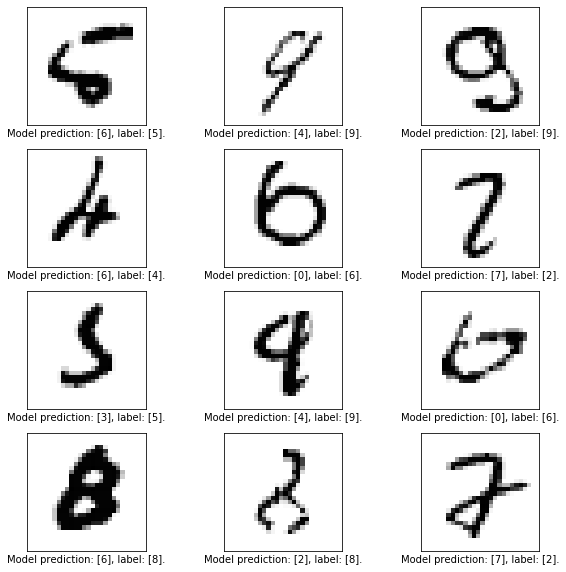

In [30]:
# Let's see where the model predicts wrong
number_of_wrong_predictions = len(y_pred) - len(np.argwhere(y_pred == y_test))
print(f"The model was wrong in {number_of_wrong_predictions} cases of {len(y_test)}.")
indexes_of_wrong_predictions = np.argwhere(y_pred != y_test)
num_wrong_to_plot = 12  # Make it dividable by 3
plt.figure(figsize=(10,10))
for i in range(num_wrong_to_plot):
    index_of_wrong = indexes_of_wrong_predictions[i]
    plt.subplot(num_wrong_to_plot / 3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[index_of_wrong][0, :, :, 0], cmap='Greys')
    plt.xlabel(f"Model prediction: {y_pred[index_of_wrong]}, label: {y_test[index_of_wrong]}.")
plt.show()